In [5]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

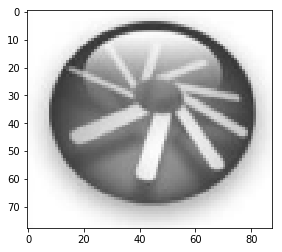

In [17]:
img =  cv2.imread('pic.png', cv2.COLOR_BAYER_RG2GRAY)
plt.imshow(img)

### 高斯滤波

In [16]:
kernel = cv2.getGaussianKernel(3, -1)

In [18]:
img_gauss = cv2.filter2D(img, -1, kernel)

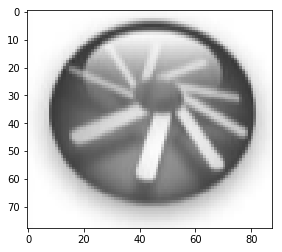

In [19]:
plt.imshow(img_gauss)

### 均值滤波

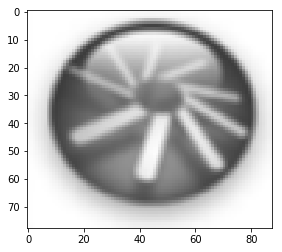

In [21]:
img_blur = cv2.blur(img, (3,3))
plt.imshow(img_blur)

### 中值滤波

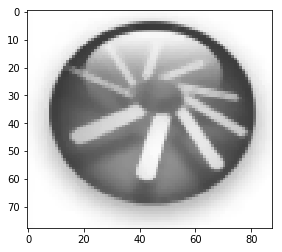

In [25]:
img_medianblur = cv2.medianBlur(img,3)
plt.imshow(img_medianblur)

## 空域锐化

### lapaian算子

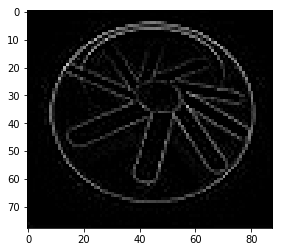

In [28]:
img_lap = cv2.Laplacian(img, -1, 2)
img_lap_dst = cv2.convertScaleAbs(img_lap)
plt.imshow(img_lap_dst)

### sobel算子

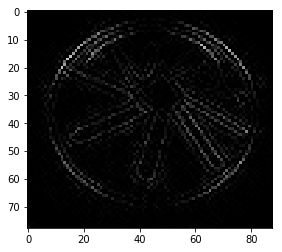

In [34]:
# 2阶
img_sobel = cv2.Sobel(img, -1,2,2)
plt.imshow(img_sobel)

### prewitt算子

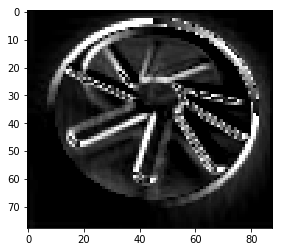

In [37]:
import numpy as np
kx = np.array([1, 1, 1, 0, 0, 0, -1, -1, -1]).reshape(3,3)
ky = np.array([-1, 0, 1, -1, 0, 1, -1, 0, 1]).reshape(3,3)
img_x = cv2.filter2D(img, -1, kx)
img_y = cv2.filter2D(img, -1, ky)
img_prewitt = img_x + img_y
plt.imshow(img_prewitt)

## 频域滤波
### 低通滤波

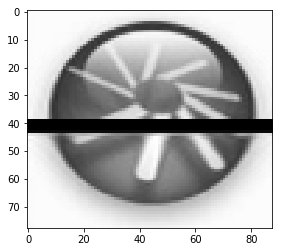

In [69]:
mask = np.zeros(img.shape, np.uint8)
r = int(mask.shape[0]/2)
c = int(mask.shape[1]/2)
rad = 40
cv2.circle(mask, (r,c), rad , (1,1,1), thickness=-1)  
f1 = np.fft.fft2(img)
f1shift = np.fft.fftshift(f1)
f1shift *= mask
f2shift = np.fft.ifftshift(f1shift)
img_new = np.fft.ifft2(f2shift)
img_new = np.abs(img_new)
img_new =  (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))

plt.imshow(img_new)

### 高通滤波

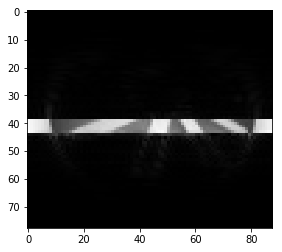

In [70]:
mask = np.ones(img.shape, np.uint8)
r = int(mask.shape[0]/2)
c = int(mask.shape[1]/2)
rad = 40
cv2.circle(mask, (r,c), rad , (0, 0, 0), thickness=-1)  
f1 = np.fft.fft2(img)
f1shift = np.fft.fftshift(f1)
f1shift *= mask
f2shift = np.fft.ifftshift(f1shift)
img_new = np.fft.ifft2(f2shift)
img_new = np.abs(img_new)
img_new =  (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))

plt.imshow(img_new)

## 图像清晰与二值化

公式在哪....